# Módulo 5: Validación UG

# Librerias

In [29]:
import pandas as pd 
import plotly.express as px
import probscale
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

# Carga de archivos

In [30]:
DH = pd.read_csv('output_mod4.csv', sep=',')
DH

,East,North,Elevation,bo,cpy,py,alte,mine,dom,ug
0,156911.7393,93193.44188,3827.13,0.000,0.564,1.199,BTK,CPY,3,3
1,156908.3362,93214.70964,3768.98,0.019,0.671,3.247,BTK,CPY,3,3
2,156905.6440,93233.72129,3712.19,0.097,0.582,1.035,BTK,BN,3,4
3,156903.2416,93252.82611,3653.51,0.193,0.487,0.780,BTK,CPY,3,3
4,156901.0979,93270.77183,3598.07,0.058,1.036,2.730,BTK,CPY,3,3
...,...,...,...,...,...,...,...,...,...,...
1270,156988.2447,92051.49218,2849.81,0.039,0.947,0.063,BTK,CPY,3,3
1271,157005.5199,92071.95481,2753.56,0.001,1.000,0.272,BTK,CPY,3,3
1272,156214.7871,91746.89044,3249.31,0.019,0.740,7.601,SCL,CPY,3,2
1273,156214.4738,91738.09338,3047.85,0.001,1.139,7.086,ANH,CPY,3,2


# Estadísticas por categoría: UG

In [31]:
stats = DH.groupby(['ug']).describe()
stats['bo']

,count,mean,std,min,25%,50%,75%,max
ug,,,,,,,,
1,233.0,0.018343,0.050815,0.0,0.0000,0.001,0.00800,0.360
2,294.0,0.038901,0.077057,0.0,0.0000,0.004,0.03275,0.570
3,409.0,0.125289,0.153745,0.0,0.0120,0.079,0.16300,0.880
4,339.0,0.332510,0.212706,0.0,0.1805,0.308,0.44800,1.661


# Distribución acumulada por categoría (Probplot): UG

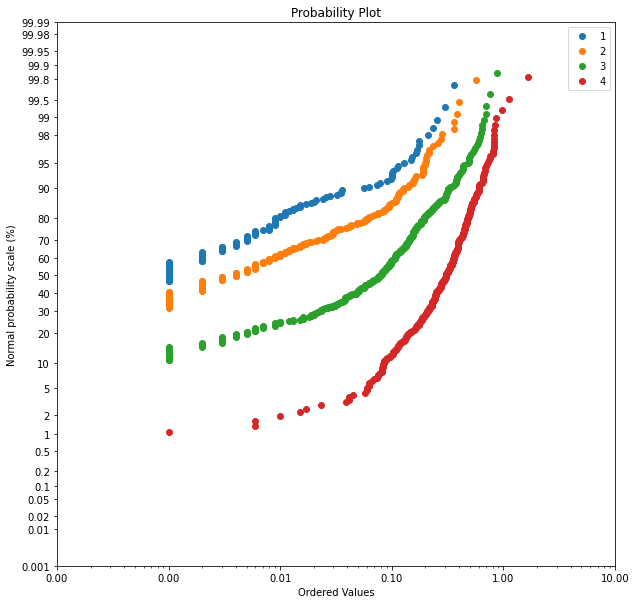

In [32]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(figsize=(10,10))
for category in DH.groupby('ug').groups.keys():
    xData = DH.groupby('ug').get_group(category)['bo'].sort_values()
    probscale.probplot(xData, ax=ax, probax='y', datascale='log', label=category)
ax.legend()
ax.set_ylim(bottom=0.001,top=99.99)
ax.set_xlim(left=1e-4, right=1e1)
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
ax.set_xlabel('Ordered Values')
ax.set_ylabel('Normal probability scale (%)')
ax.set_title('Probability Plot')
plt.savefig('probPlot_ug.png')

# Visualización por categoría: UG

In [33]:
DH["ug"] = DH["ug"].astype(str)
fig = px.scatter_3d(DH, x='East', y='North', z='Elevation', color='ug')
fig.update_traces(marker=dict(size=5.0))
fig.show()

# Histograma

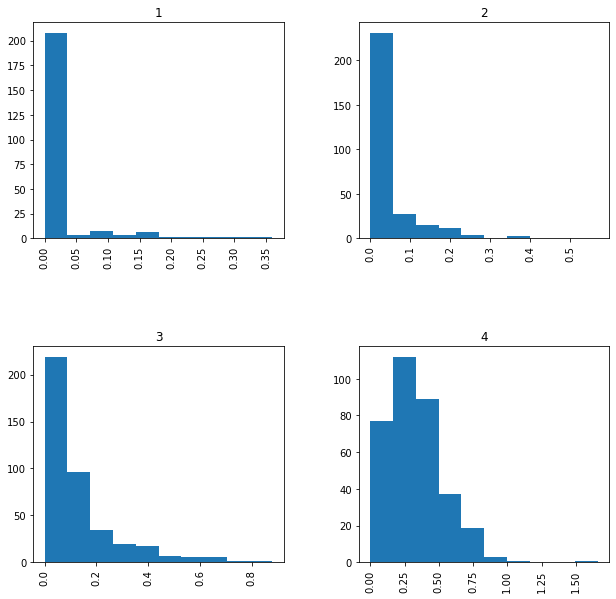

In [34]:
DH.hist(column='bo', by='ug', figsize=(10,10))
plt.savefig('hist_by_ug.png')

# Boxplot

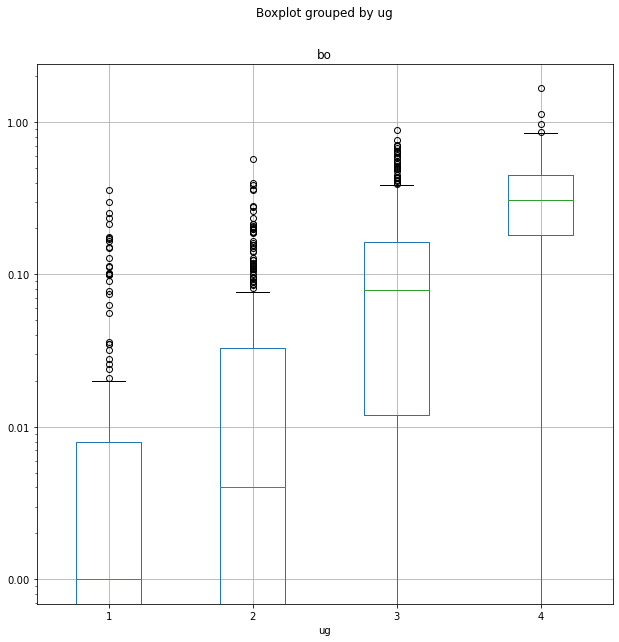

In [35]:
DH.boxplot(column='bo', by='ug', figsize=(10,10))
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.savefig('boxplot_by_ug.png')

# Media v/s Std

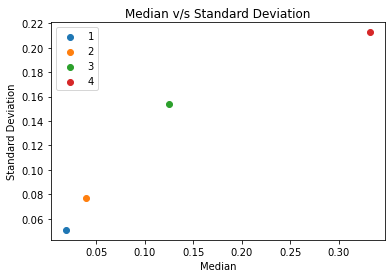

In [36]:
stats_by_ug = DH.groupby(['ug']).describe()
fig, ax = plt.subplots()
for ug in DH.groupby('ug').groups.keys():
    ax.scatter(stats_by_ug['bo']['mean'][ug], stats_by_ug['bo']['std'][ug], label=ug)
ax.legend()
ax.set_xlabel('Median')
ax.set_ylabel('Standard Deviation')
ax.set_title('Median v/s Standard Deviation')
plt.savefig('media_vs_std.png')